In [1]:
cd(@__DIR__)
include(raw"utils\utils.jl")

mulmedian (generic function with 1 method)

Making a calendar of 100 years

In [2]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [3]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [4]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
 -12.890923997632576
 -15.28202343871748
 -14.16731882670426
 -10.014517642258458
 -13.91625176444461
  -6.281037059032254
   0.293936804019002
   0.8018408214238215
   2.683579424679782
   ⋮
   6.2534929252606855
   9.80283739205455
   4.189838445721592
   4.774856295646411
   8.232926539076914
  16.206210044308225
   3.5501165313993823
  -0.09060628532412984
   3.8718094065040933

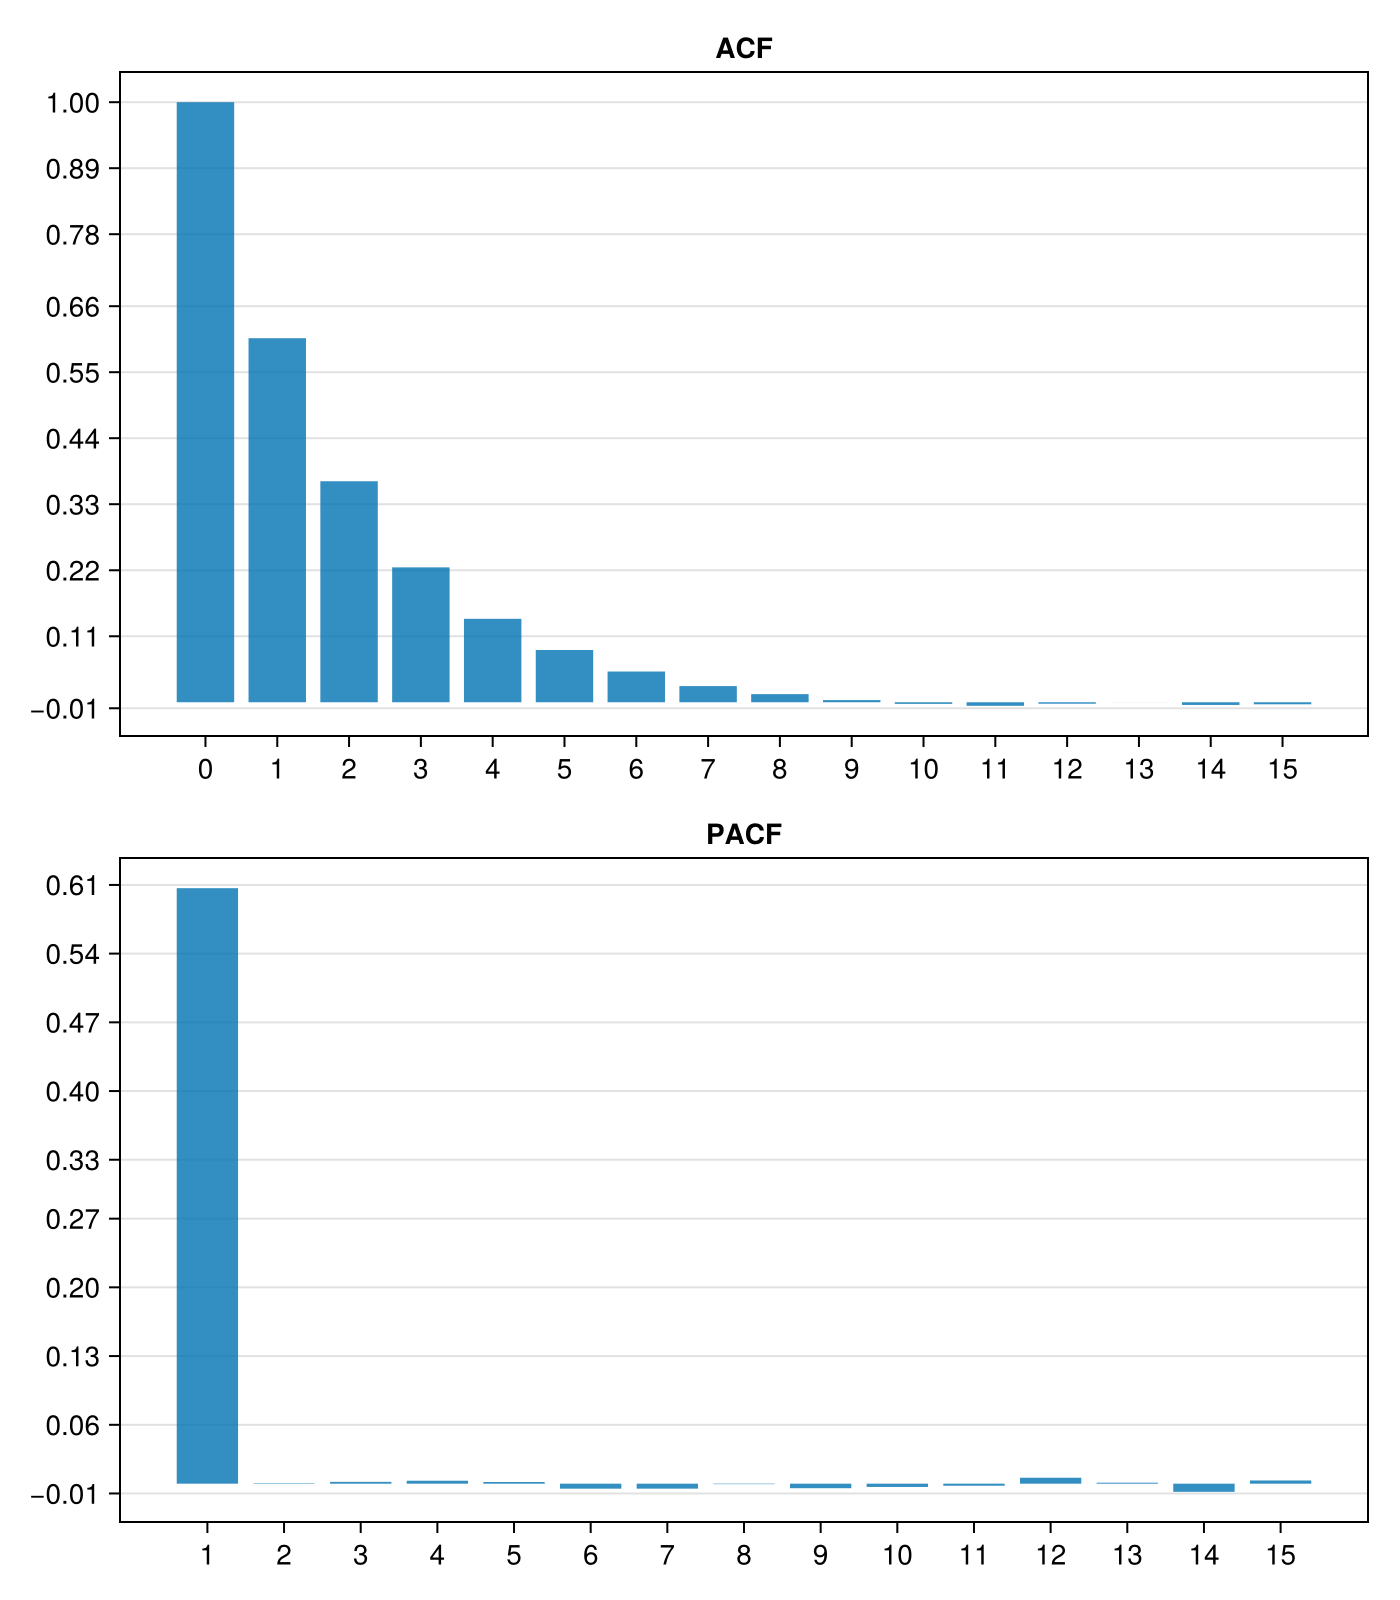

In [5]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [6]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.00675831,1.12638
2,σ,0.00794622,0.132437


# AR model on each month

Parameters for each month

In [7]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [8]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[2.554299728640884, 2.0773003719948844, 1.7632538792011427, 1.399934330844818, 0.4648330193899794, 3.594335609440104, 1.1664999024598162, 3.051398935256814, 1.0361363041460088, 0.8819687558936883  …  -0.8785300846821738, 2.0932634641707977, 1.8754152245050095, -0.8248133649366003, -0.4481574592091451, -1.9631152449905775, -1.9613013097644347, 1.7680678186590517, 1.8493175356081843, -1.367499411632688], [-2.008219396738364, -1.2405332170357928, -0.9758067048688102, -0.5570414340090325, -0.5695754352577579, 1.1760690319189404, 0.4201617936312312, 0.5774231329294985, 0.19442681695996264, 0.8796514347267889  …  0.5391588309349028, -2.0420217200311073, 0.15324516554248402, -2.2791097260631092, -2.849966426106489, -2.314140357263245, -1.2451921633353003, -1.6356129000596267, -0.5966222587185522, -2.0596011837058463], [-0.5153242496028472, -1.4343432558475504, -0.23834186080506992, 0.771876023394872, -0.6705728248538638, 0.12473452645769922, 0.6677

## Autocorrelations

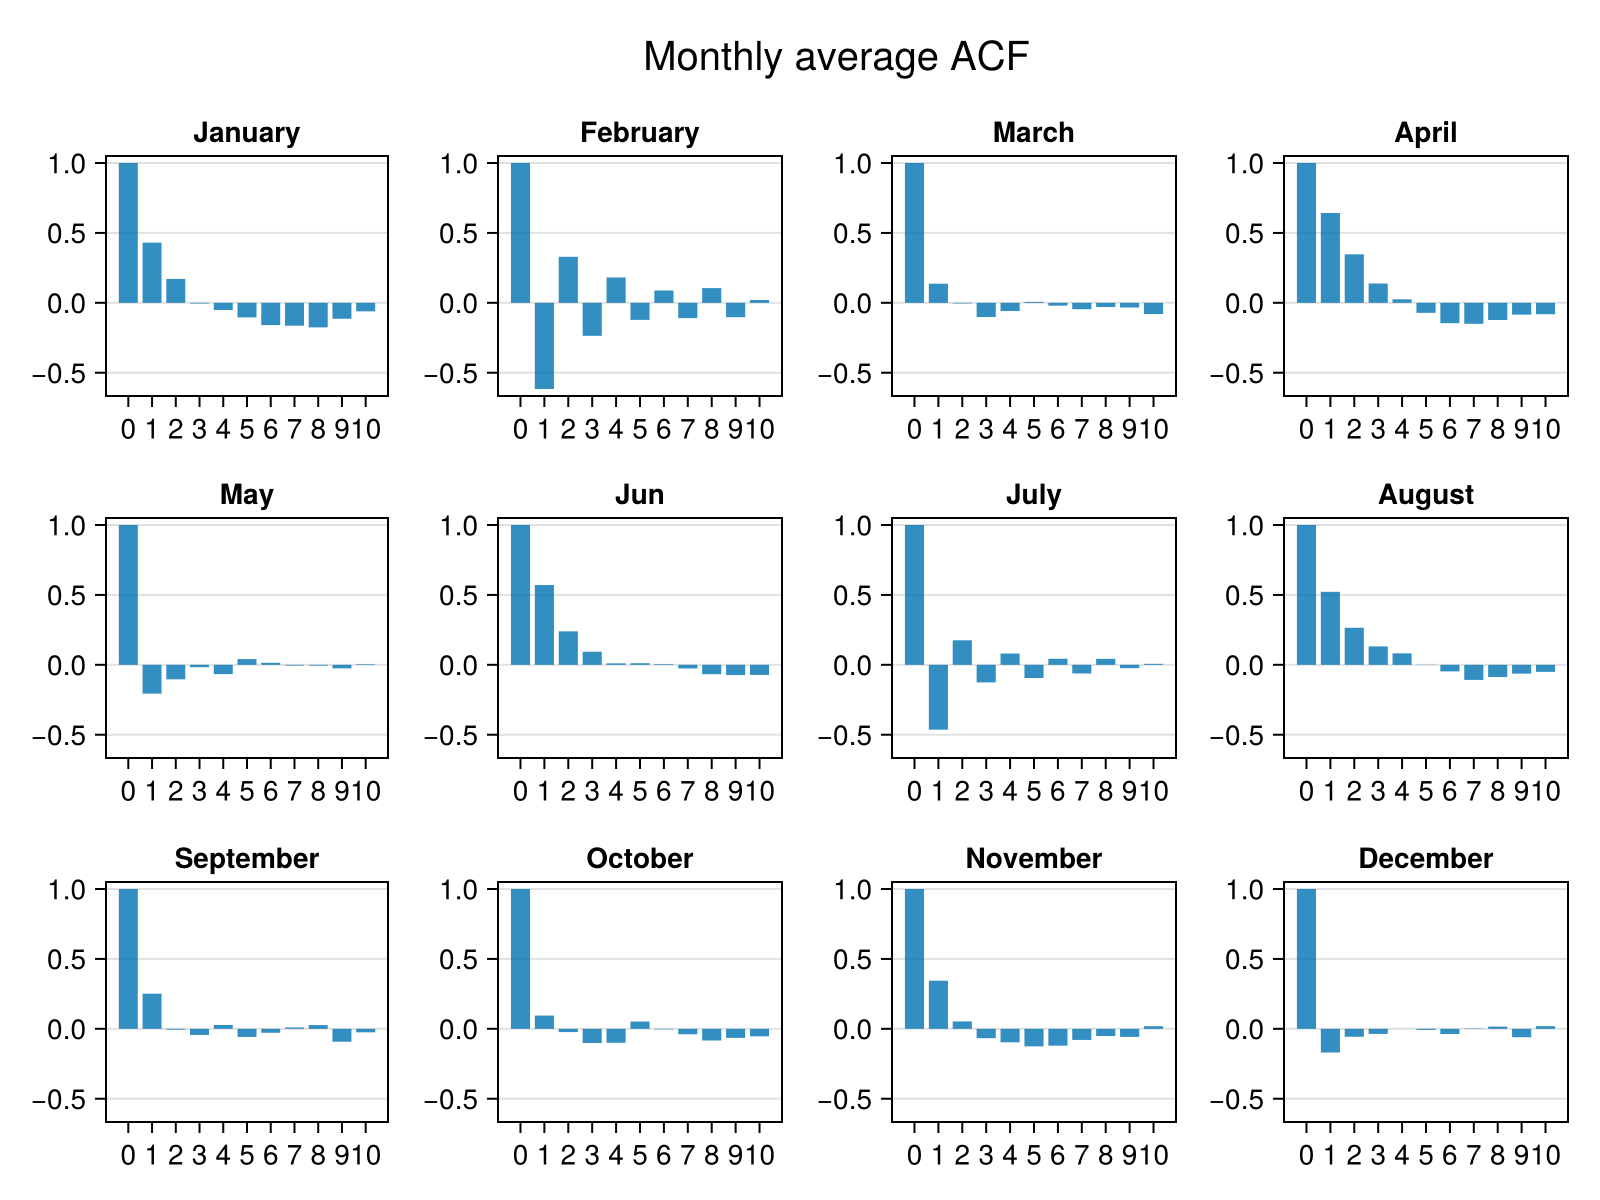

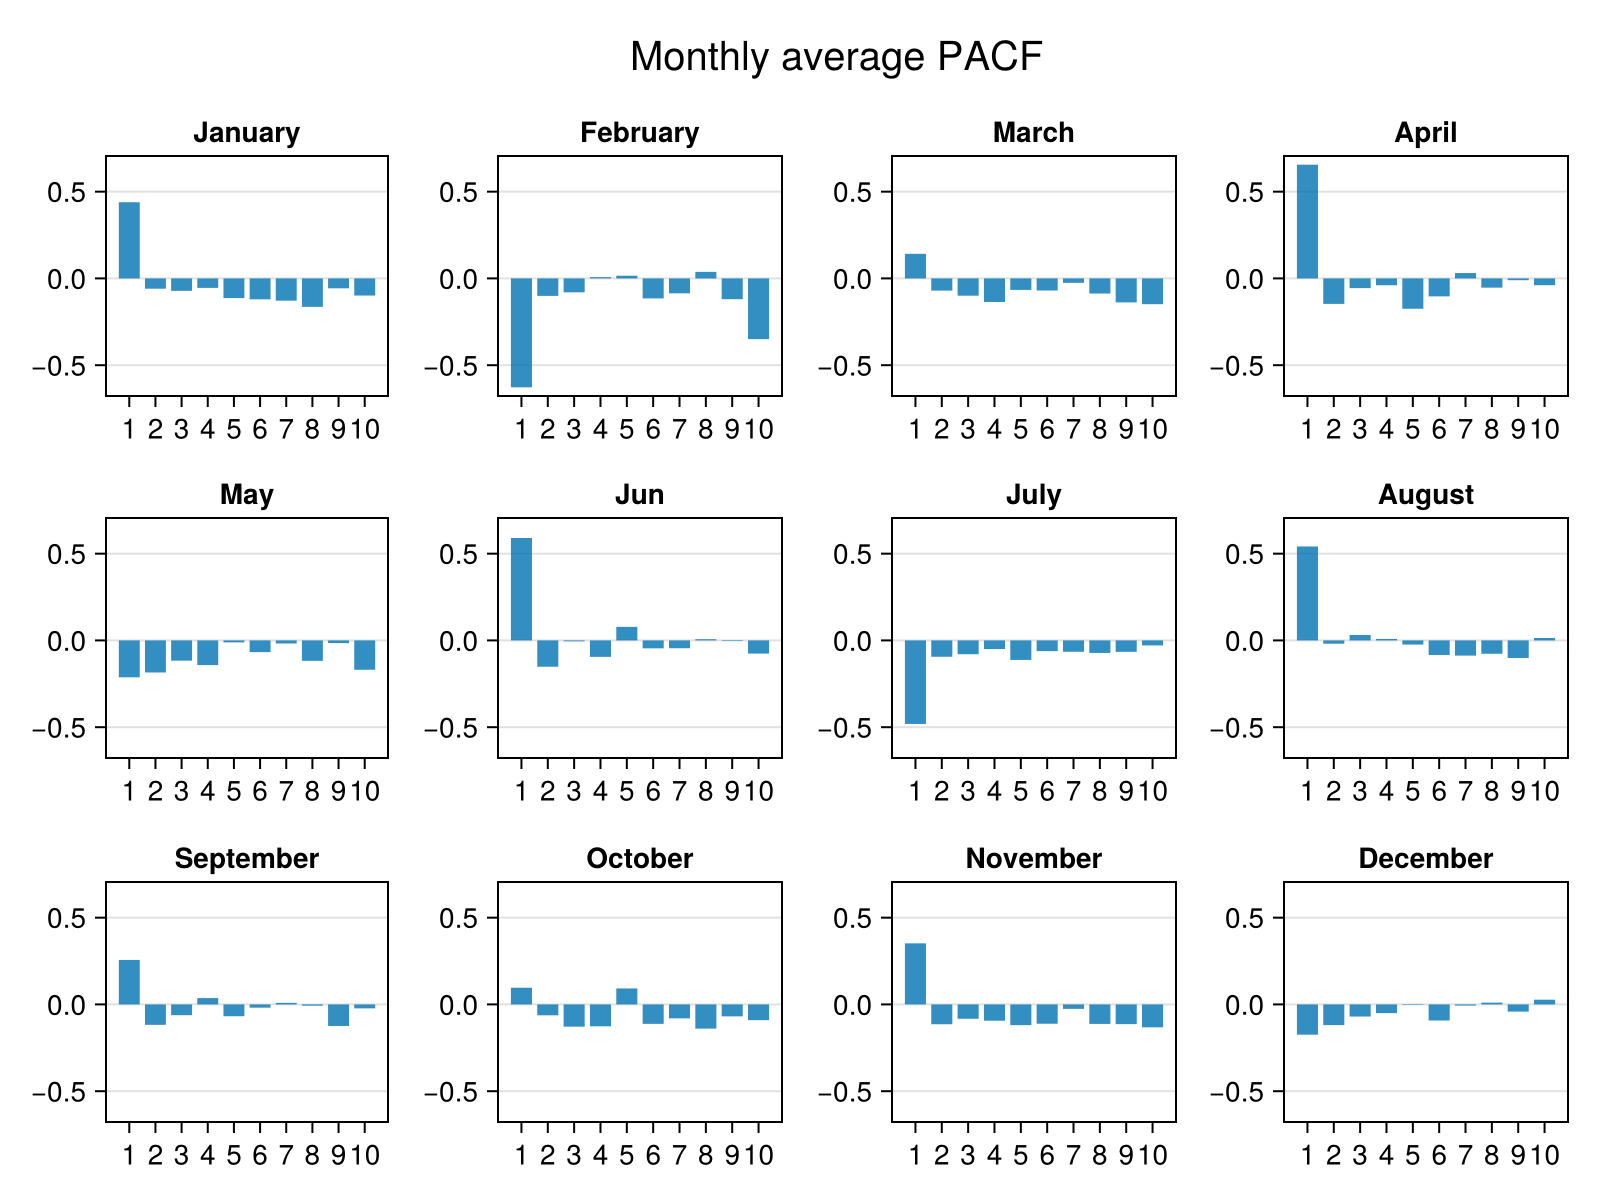

CairoMakie.Screen{IMAGE}


In [9]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

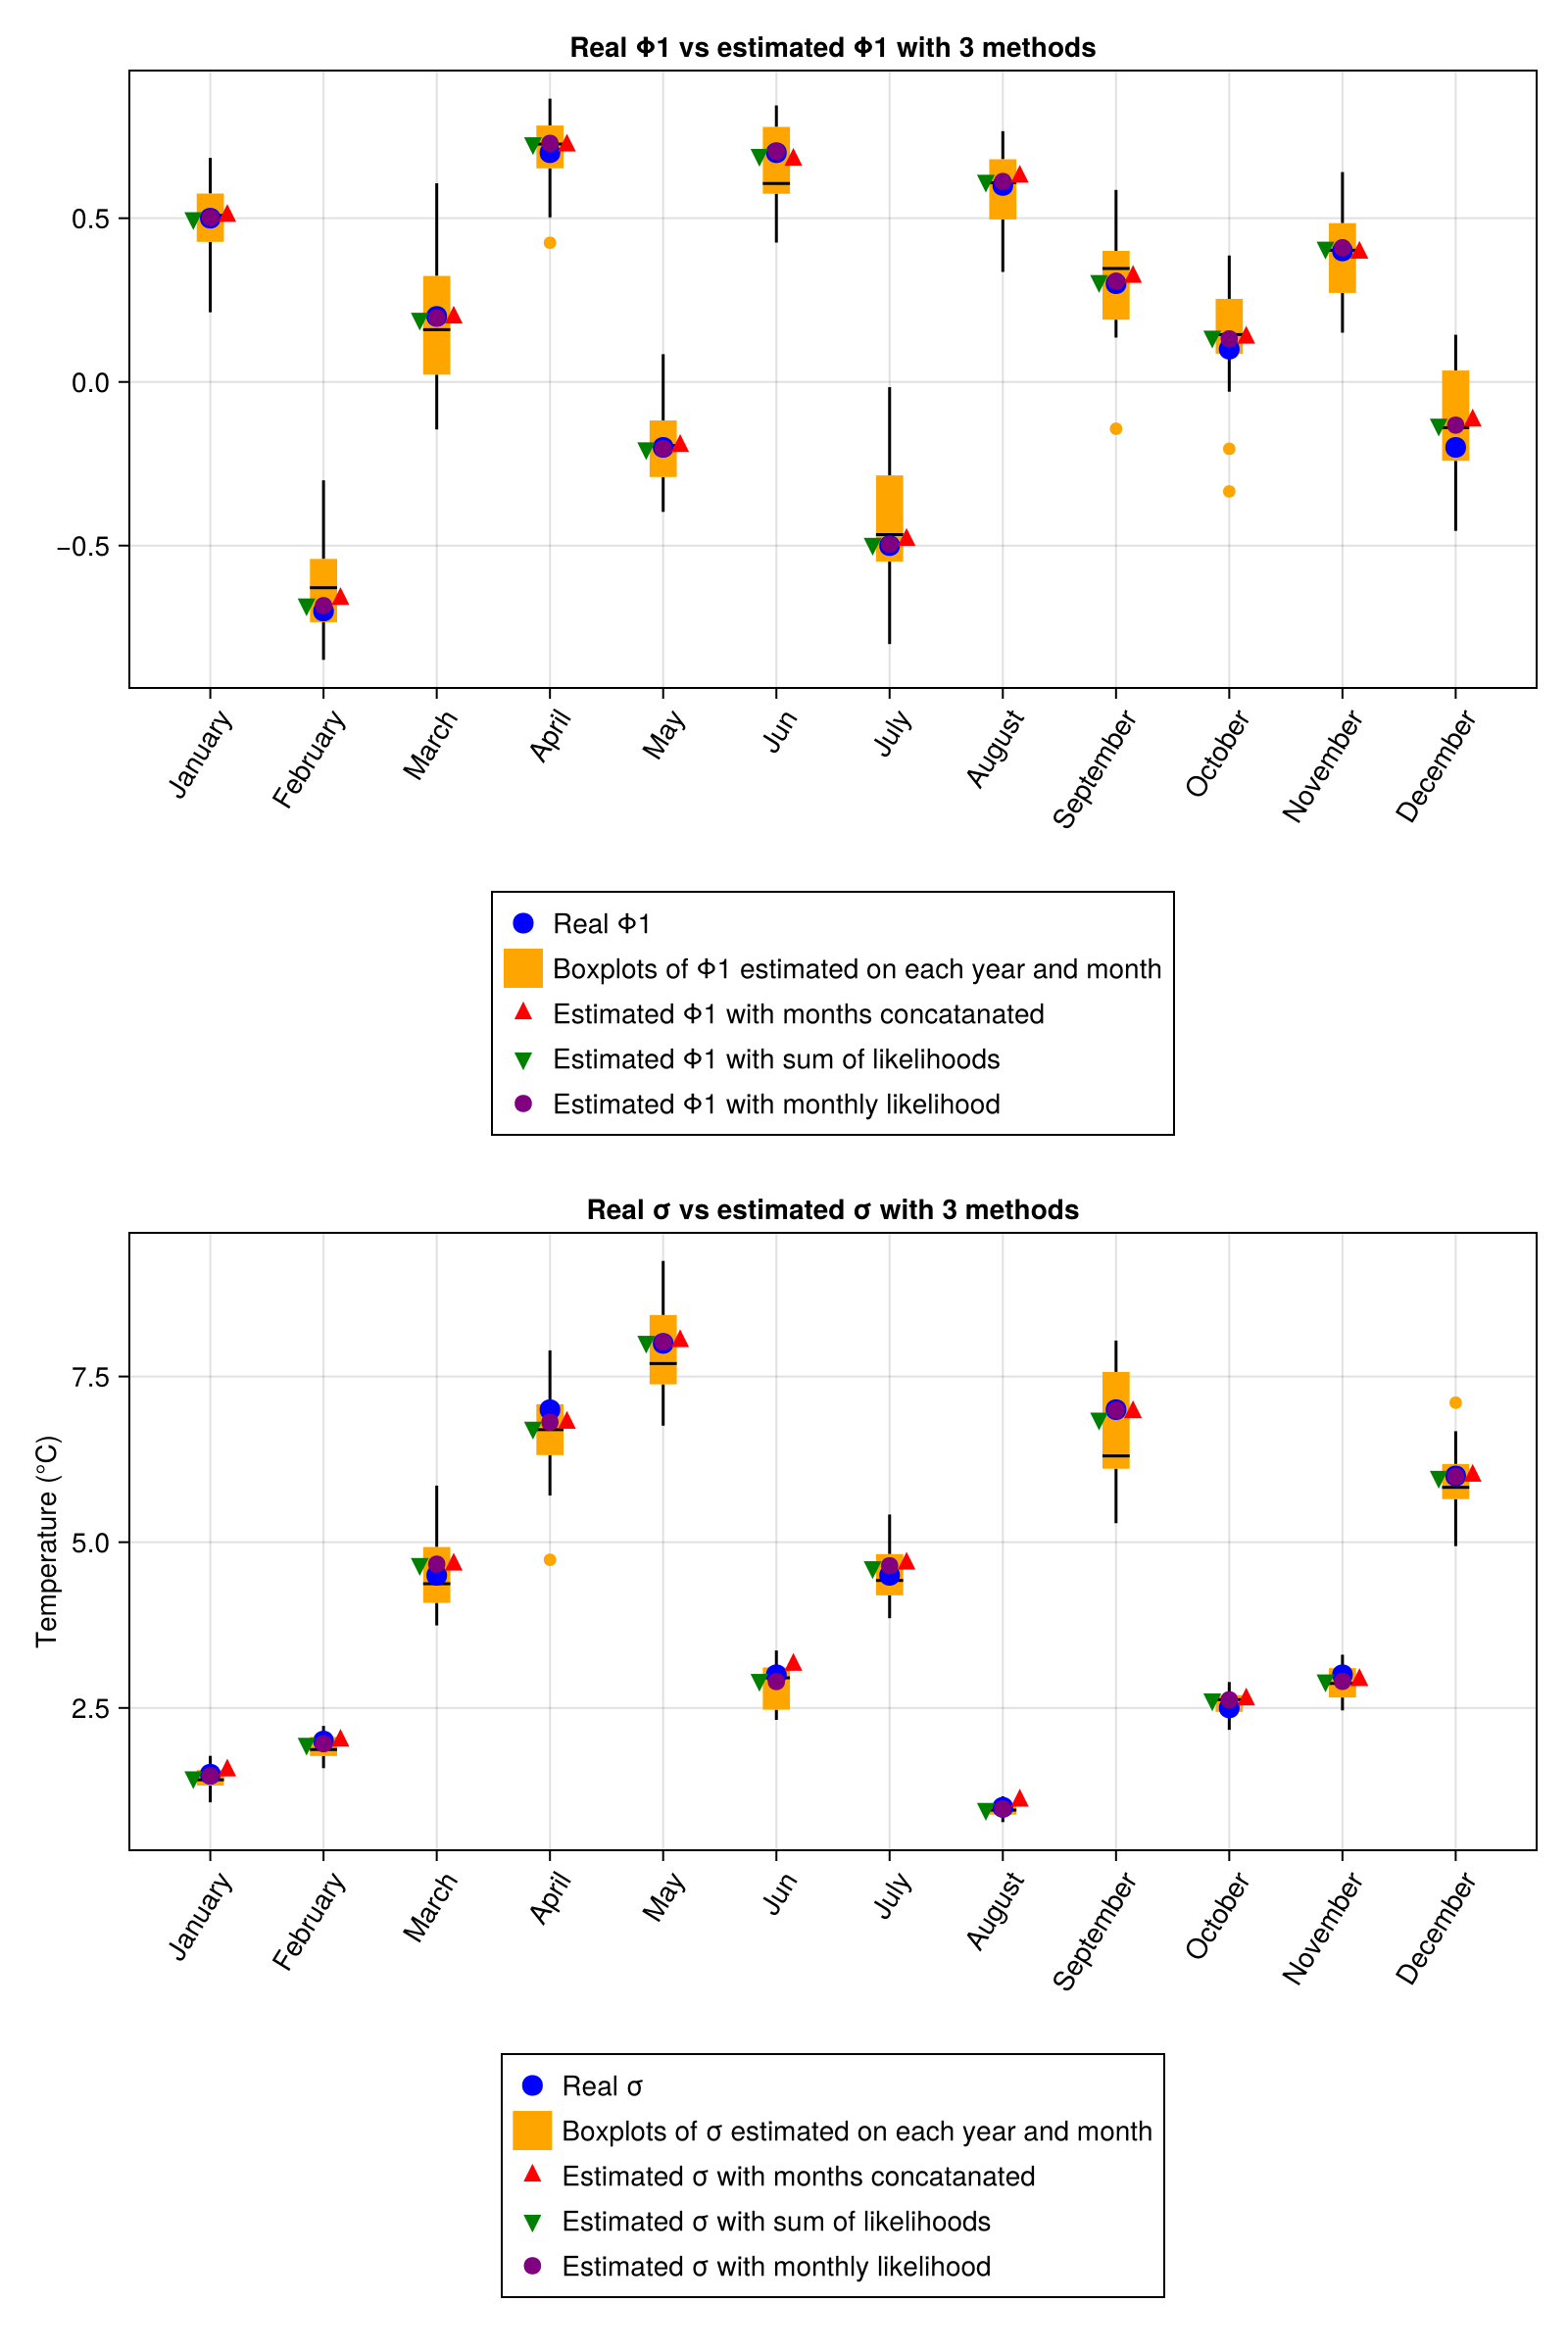

Row,Parameter,Month concatanation,Sum LL,Monthly LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64,Float64
1,Φ1,9.10066,7.91235,7.09643,9.9688,12.5896
2,σ,3.18672,2.5775,2.33993,3.42253,4.37804


7

In [10]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [11]:
include("utils/Simulation.jl")
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=10
sim=SimulateScenarios([4.],Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)),Φ_vec, σ_vec,n=10)
sample_=GatherYearScenarios(sim,Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)))


366-element Vector{Vector{AbstractFloat}}:
 [4.0, 2.439167172039176, -6.275018941557153, 0.6215926660610133, -1.835414582476061, 3.365348032548377, -2.303199775869702, -2.25436692386042, -3.7961138313162173, -1.1513255235658362  …  4.0, 1.0790455889180086, -4.876049885982073, 4.30680729858507, 1.2236240388682909, 3.5649947080577773, -0.605331560563118, 5.580058703158796, -4.516951531751026, 4.152127276211827]
 [2.1379238572686887, 1.8946264979031955, -5.611863144325471, 0.7869440412602563, -0.8077988423203308, 1.1907755215177316, -1.861396824180428, -0.8542848838551877, -2.4303096548384246, -0.005012754479205128  …  -1.3954296958105143, 2.6513535249097298, 2.647440547255613, 0.020369588122047144, -0.8410632500737494, 0.6226478494522565, 0.22923855312611807, -1.2742154285455811, 1.6425597684614037, -3.0092390762252545]
 [0.8875499319323622, 2.5719369043928486, -4.39692409894902, 3.527806429661434, 1.7162837638176969, 2.0079668205890844, 1.7539190343591025, -2.313389190115476, -0.4204735

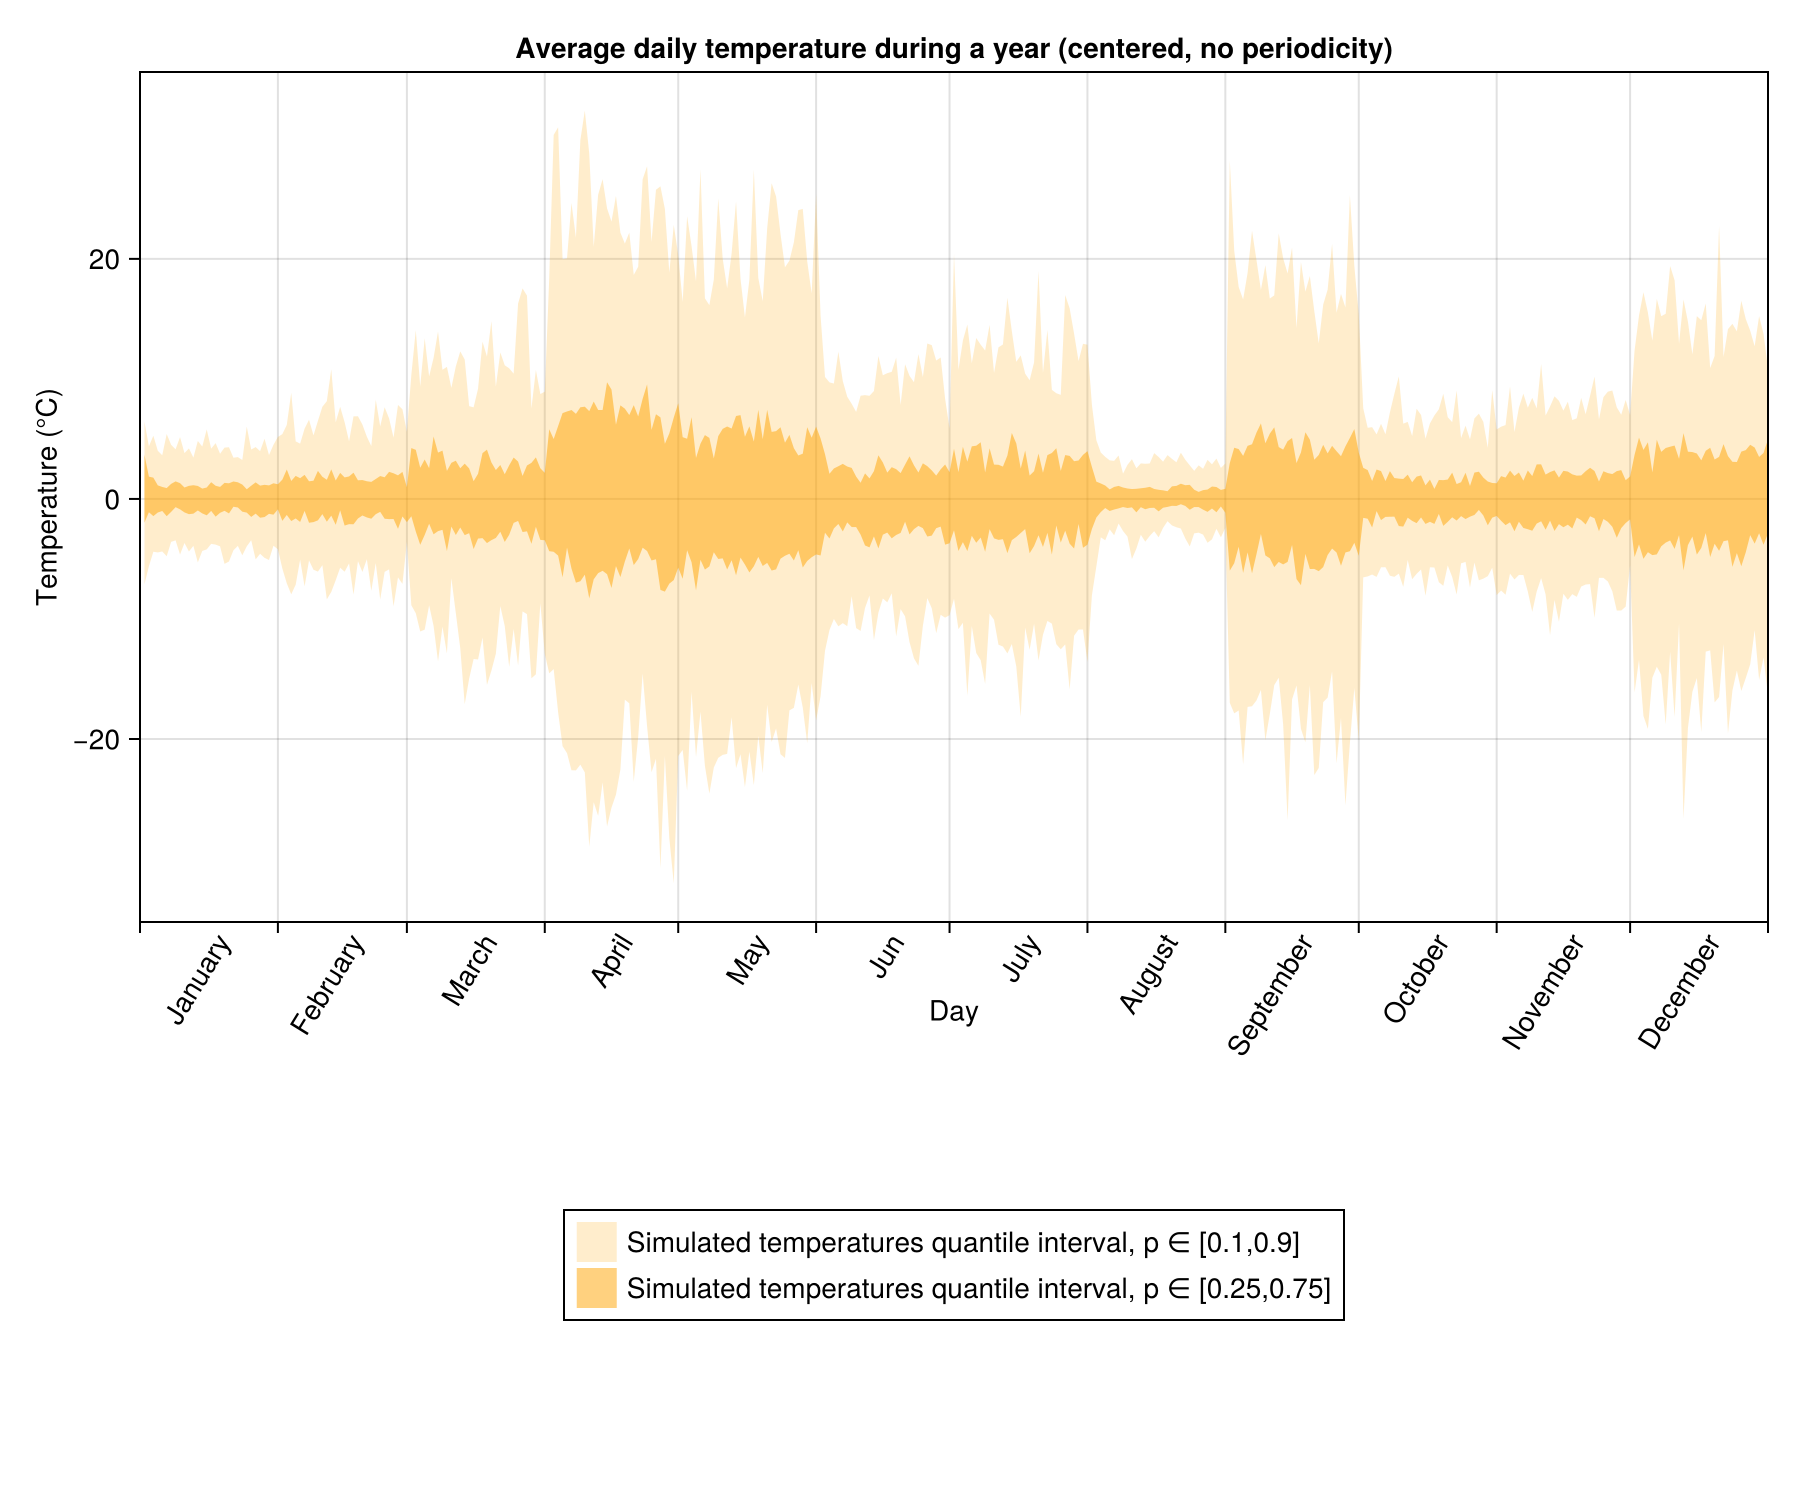

In [12]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(minimum.(sample_),maximum.(sample_)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)